In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/cancer.csv')

In [3]:
df.head()

,Unnamed: 0,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,0,5.0,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1,8.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,2,6.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,3,6.1,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,4,7.1,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()


,Cancer_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,5.0,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,8.0,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,6.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,6.1,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,7.1,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


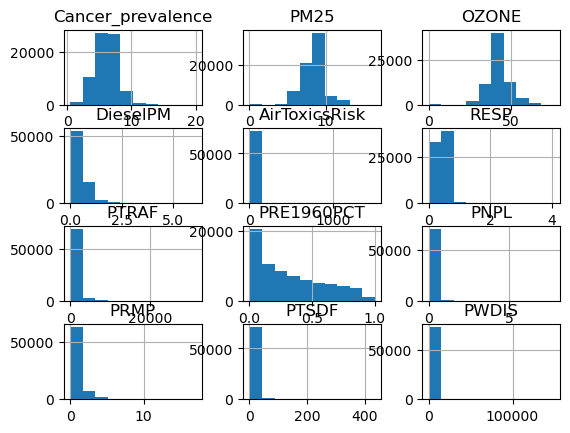

In [5]:
df.hist()
plt.show()

In [6]:
X = df.copy()
X.drop('Cancer_prevalence', axis=1, inplace=True)
y = df['Cancer_prevalence']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

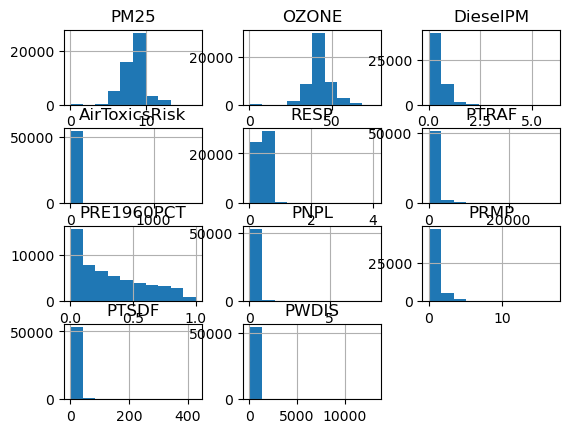

In [8]:
X_train.hist()
plt.show()

In [9]:
X_train.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
5439,15.005589,63.271844,0.544372,47.994543,0.772994,278.100204,0.306085,0.587526,6.568736,6.907831,0.000597
32592,6.709160,40.240095,0.509480,28.016358,0.365101,2106.040949,0.578472,0.075178,0.346235,2.966234,0.000470
62047,9.574344,47.113327,0.485297,32.227129,0.434944,126.866288,0.006084,0.021420,0.137003,0.431193,0.000000
70993,6.330657,39.413047,0.370096,21.505994,0.282915,533.358818,0.158177,0.196181,0.855078,0.418904,0.000000
28352,8.514122,43.974056,0.268193,27.668159,0.369287,127.882285,0.122207,0.011215,0.271193,0.328212,0.000067


In [10]:
# Saving data without normalization
X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_cancer')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_cancer')
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_cancer')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_cancer')

In [11]:
# Taking the log of the data in X_train that are not close to being normally distributed
X_train_log = X_train.copy()

pt = PowerTransformer()
pt.fit(X_train_log[['DieselPM']])
X_train_log['DieselPM'] = pt.transform(X_train_log[['DieselPM']])

pt1 = PowerTransformer()
pt1.fit(X_train_log[['AirToxicsRisk']])
X_train_log['AirToxicsRisk'] = pt1.transform(X_train_log[['AirToxicsRisk']])

pt2 = PowerTransformer()
pt2.fit(X_train_log[['RESP']])
X_train_log['RESP'] = pt2.transform(X_train_log[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train_log[['PTRAF']])
X_train_log['PTRAF'] = pt3.transform(X_train_log[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train_log[['PRE1960PCT']])
X_train_log['PRE1960PCT'] = pt4.transform(X_train_log[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train_log[['PNPL']])
X_train_log['PNPL'] = pt5.transform(X_train_log[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train_log[['PRMP']])
X_train_log['PRMP'] = pt6.transform(X_train_log[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train_log[['PTSDF']])
X_train_log['PTSDF'] = pt7.transform(X_train_log[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train[['PWDIS']])
X_train_log['PWDIS'] = pt8.transform(X_train_log[['PWDIS']])

y_train_log = y_train.copy()
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.reshape(-1,1)
pt9.fit(y_train_log)
y_train_log = pt9.transform(y_train_log)
y_train_log = np.ravel(y_train_log)

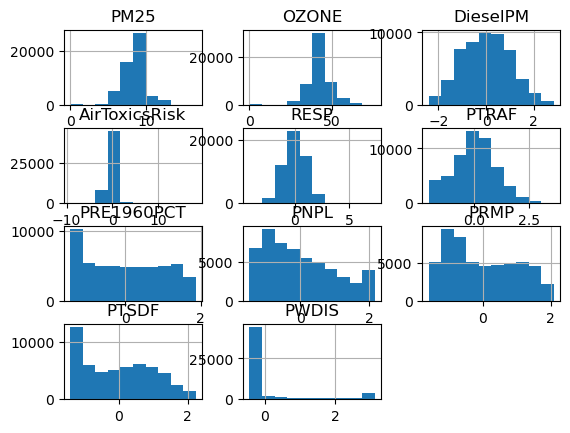

In [12]:
X_train_log.hist()
plt.show()

PWDIS should just be left out of the data since it is not normally distributed.

In [13]:
X_test_log = X_test.copy()

In [14]:
X_train_log.drop('PWDIS', axis=1, inplace=True)


X_test_log.drop('PWDIS', axis=1, inplace=True)

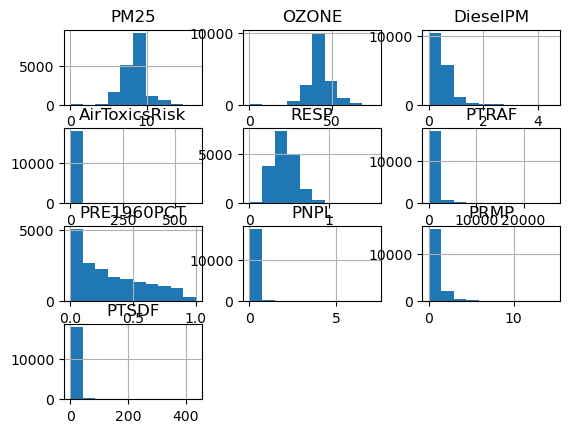

In [15]:
X_test_log.hist()
plt.show()

In [18]:
# Transforming the test data using the PowerTransformer fit on the training data
X_test_log['DieselPM'] = pt.transform(X_test_log[['DieselPM']])

X_test_log['AirToxicsRisk'] = pt1.transform(X_test_log[['AirToxicsRisk']])

X_test_log['RESP'] = pt2.transform(X_test_log[['RESP']]) 

X_test_log['PTRAF'] = pt3.transform(X_test_log[['PTRAF']])

X_test_log['PRE1960PCT'] = pt4.transform(X_test_log[['PRE1960PCT']])

X_test_log['PNPL'] = pt5.transform(X_test_log[['PNPL']])

X_test_log['PRMP'] = pt6.transform(X_test_log[['PRMP']])

X_test_log['PTSDF'] = pt7.transform(X_test_log[['PTSDF']])


y_test_log = y_test.copy()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.reshape(-1,1)
y_test_log = pt9.transform(y_test_log)
y_test_log = y_test_log.reshape(18081,)
y_test_log.shape

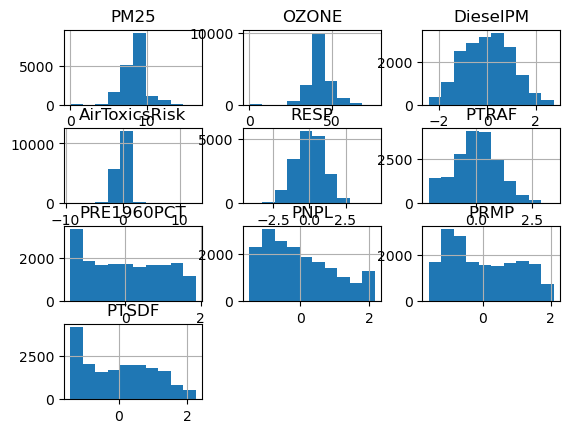

In [19]:
X_test_log.hist()
plt.show()

In [ ]:
# Saving data transformed by power transformer

X_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_cancer')
X_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_cancer')
y_test_log = pd.Series(y_test_log)
y_train_log = pd.Series(y_train_log)
y_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_cancer')
y_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_cancer')

Asthma data should now be ready to model